In [32]:
# Cell 1: Load data & filter to GMM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the aggregated metrics CSV
agg = pd.read_csv("aggregated_metrics.csv")

# Filter to only the GMM model
gmm = agg[agg["model"] == "GMM"].set_index("group")

# Display the full GMM metrics table
display(gmm[["tp", "fp", "fn", "tn", "precision", "recall", "f1", "accuracy"]])


,tp,fp,fn,tn,precision,recall,f1,accuracy
group,,,,,,,,
Variant - Two clearly separated peaks,0,0,0,10,1.00,1.0,1.00,1.00
Variant - Strong overlap between two peaks,2,0,3,0,1.00,0.4,0.57,0.40
"Variant - Four peaks: 2 overlap, 2 isolated",5,1,0,9,0.83,1.0,0.91,0.93
Variant - Cluster of 3 overlapping peaks,5,0,0,0,1.00,1.0,1.00,1.00
Variant - Close but not overlapping peaks,0,0,0,10,1.00,1.0,1.00,1.00
Variant - Intense + weak overlap,1,0,4,5,1.00,0.2,0.33,0.60
"Variant - Five peaks: 3 spaced, 2 overlapping",0,5,5,10,0.00,0.0,0.00,0.50


In [33]:
# Cell 2: Table 4.2 – Confusion matrix counts for GMM
# (This will be your Table 4.2 in the paper)
confusion = gmm[["tp", "fp", "fn", "tn"]]
print("Table 4.2: GMM Confusion Matrix by Variant Group\n")
display(confusion)




Table 4.2: GMM Confusion Matrix by Variant Group



,tp,fp,fn,tn
group,,,,
Variant - Two clearly separated peaks,0,0,0,10
Variant - Strong overlap between two peaks,2,0,3,0
"Variant - Four peaks: 2 overlap, 2 isolated",5,1,0,9
Variant - Cluster of 3 overlapping peaks,5,0,0,0
Variant - Close but not overlapping peaks,0,0,0,10
Variant - Intense + weak overlap,1,0,4,5
"Variant - Five peaks: 3 spaced, 2 overlapping",0,5,5,10


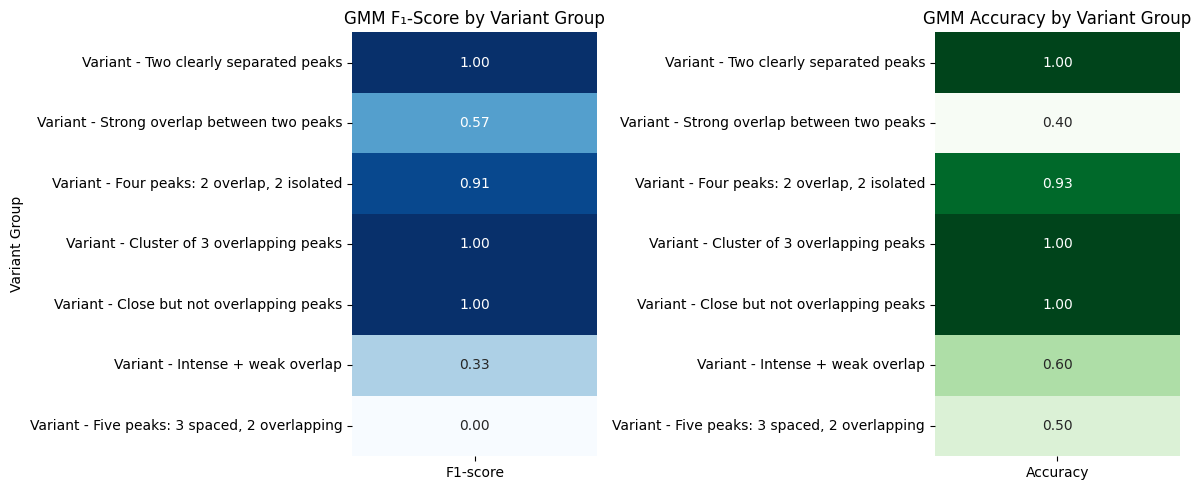

In [34]:
# Cell 3: Figure 4.2 – Heatmaps of F1-score and Accuracy for GMM
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# F1‐score heatmap
sns.heatmap(
    gmm[["f1"]].rename(columns={"f1": "F1-score"}),
    annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=ax1
)
ax1.set_title("GMM F₁-Score by Variant Group")
ax1.set_xlabel("")
ax1.set_ylabel("Variant Group")

# Accuracy heatmap
sns.heatmap(
    gmm[["accuracy"]].rename(columns={"accuracy": "Accuracy"}),
    annot=True, fmt=".2f", cmap="Greens", cbar=False, ax=ax2
)
ax2.set_title("GMM Accuracy by Variant Group")
ax2.set_xlabel("")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()


                                            group  \
0           Variant - Two clearly separated peaks   
3      Variant - Strong overlap between two peaks   
6     Variant - Four peaks: 2 overlap, 2 isolated   
9        Variant - Cluster of 3 overlapping peaks   
12      Variant - Close but not overlapping peaks   
15               Variant - Intense + weak overlap   
18  Variant - Five peaks: 3 spaced, 2 overlapping   

                             base_group        scenario_class  
0           Two clearly separated peaks       Fully Separated  
3      Strong overlap between two peaks  Strongly Overlapping  
6     Four peaks: 2 overlap, 2 isolated    Weakly Overlapping  
9        Cluster of 3 overlapping peaks    Weakly Overlapping  
12      Close but not overlapping peaks       Fully Separated  
15               Intense + weak overlap            Asymmetric  
18  Five peaks: 3 spaced, 2 overlapping       Near-Duplicates  


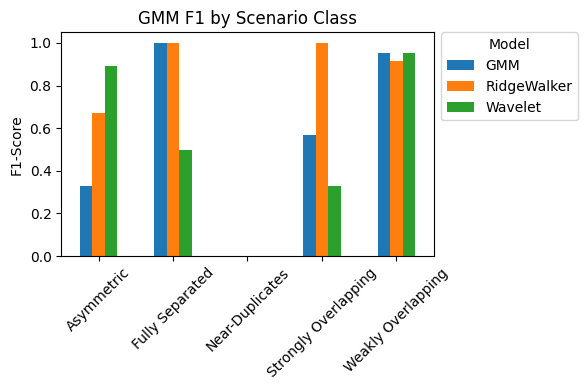

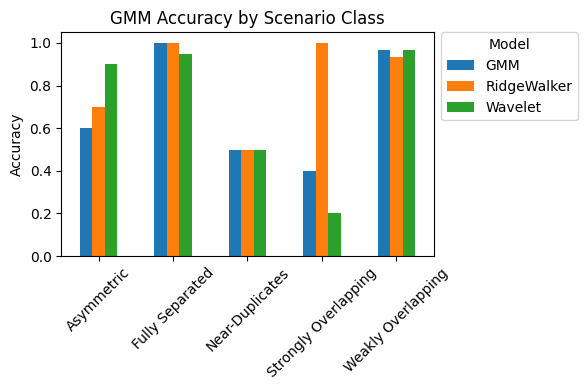

In [35]:
# 1) First, strip the "Variant - " prefix so we have the bare group name
agg["base_group"] = agg["group"].str.replace(r"^Variant -\s*", "", regex=True)

# 2) Now map to your high‐level scenario classes
scenario_map = {
    "Two clearly separated peaks":       "Fully Separated",
    "Close but not overlapping peaks":    "Fully Separated",
    "Strong overlap between two peaks":   "Strongly Overlapping",
    "Intense + weak overlap":            "Asymmetric",
    "Cluster of 3 overlapping peaks":     "Weakly Overlapping",
    "Four peaks: 2 overlap, 2 isolated": "Weakly Overlapping",
    "Five peaks: 3 spaced, 2 overlapping":"Near-Duplicates",
}
agg["scenario_class"] = agg["base_group"].map(scenario_map)

# 3) (Optional) sanity‐check that everything mapped
print( agg[["group","base_group","scenario_class"]].drop_duplicates() )

# 4) Re‐aggregate by scenario_class × model
agg_by_class = (
    agg
    .groupby(["scenario_class","model"])
    .agg({
        "tp":       "sum",
        "fp":       "sum",
        "fn":       "sum",
        "tn":       "sum",
        "precision":"mean",
        "recall":   "mean",
        "f1":       "mean",
        "accuracy": "mean"
    })
    .reset_index()
)

# 5) Pivot & plot F1‐score
f1_cls = agg_by_class.pivot(
    index="scenario_class",
    columns="model",
    values="f1"
)

# %% 
# Plot GMM F1 by Scenario Class with legend outside

import matplotlib.pyplot as plt

ax = f1_cls.plot(
    kind="bar",
    figsize=(6,4),
    rot=45,
    legend=False  # turn off the default legend
)
ax.set_title("GMM F1 by Scenario Class")
ax.set_ylabel("F1-Score")
ax.set_xlabel("")

# put the legend to the right of the plot
ax.legend(
    title="Model",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)

plt.tight_layout()
plt.show()


# %% 
# Re-plot GMM Accuracy by Scenario Class with legend moved outside right

import matplotlib.pyplot as plt

# assuming `acc_cls` is your pivoted DataFrame of accuracy by scenario_class × model

ax = acc_cls.plot(
    kind="bar",
    figsize=(6,4),
    rot=45,
    legend=False      # disable default legend
)
ax.set_title("GMM Accuracy by Scenario Class")
ax.set_ylabel("Accuracy")
ax.set_xlabel("")

# place legend to the right of the plot
ax.legend(
    title="Model",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)

plt.tight_layout()
plt.show()



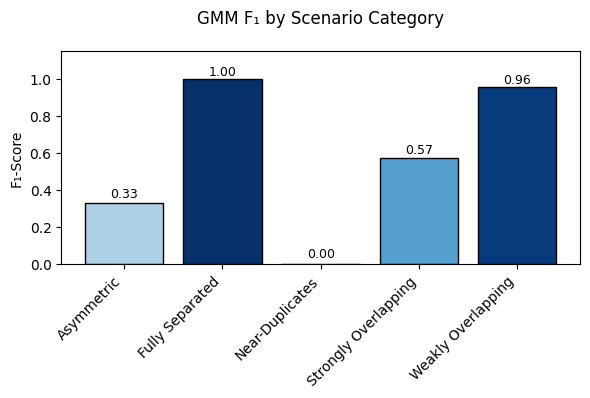

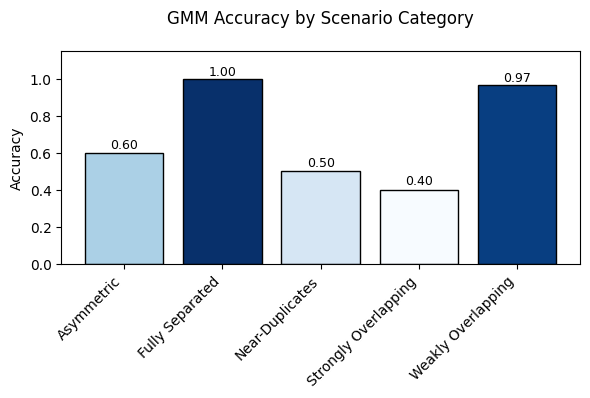

In [36]:
# %% 
# Color‐mapped, annotated GMM F₁ by Scenario Category

import matplotlib.pyplot as plt
import matplotlib as mpl

# Prepare values and colormap
vals = gmm_by_class["f1"].values
norm = mpl.colors.Normalize(vmin=vals.min(), vmax=vals.max())
cmap = mpl.cm.Blues

plt.figure(figsize=(6, 4))
bars = plt.bar(
    gmm_by_class["scenario_class"],
    vals,
    color=cmap(norm(vals)),
    edgecolor="black"
)

# Extend y‐axis to make room for annotations
ymax = vals.max() * 1.15
plt.ylim(0, ymax)

plt.title("GMM F₁ by Scenario Category", pad=20)
plt.ylabel("F₁-Score")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")

# Annotate bar values
for bar, h in zip(bars, vals):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + (ymax - h) * 0.02,
        f"{h:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


# %% 
# Color‐mapped, annotated GMM Accuracy by Scenario Category

acc_vals = gmm_by_class["accuracy"].values
norm_acc = mpl.colors.Normalize(vmin=acc_vals.min(), vmax=acc_vals.max())
cmap_acc = mpl.cm.Blues

plt.figure(figsize=(6, 4))
bars = plt.bar(
    gmm_by_class["scenario_class"],
    acc_vals,
    color=cmap_acc(norm_acc(acc_vals)),
    edgecolor="black"
)

ymax_acc = acc_vals.max() * 1.15
plt.ylim(0, ymax_acc)

plt.title("GMM Accuracy by Scenario Category", pad=20)
plt.ylabel("Accuracy")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")

for bar, h in zip(bars, acc_vals):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + (ymax_acc - h) * 0.02,
        f"{h:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


In [37]:
# %% 
# Compute the GMM confusion‐matrix and summary metrics by high‐level scenario class

import pandas as pd

# 1) Load your per‐variant aggregated metrics
agg = pd.read_csv("aggregated_metrics.csv")

# 2) Strip the "Variant - " prefix to get bare group names
agg["base_group"] = agg["group"].str.replace(r"^Variant -\s*", "", regex=True)

# 3) Define the mapping to high‐level scenario classes
scenario_map = {
    "Two clearly separated peaks":        "Fully Separated",
    "Close but not overlapping peaks":     "Fully Separated",
    "Cluster of 3 overlapping peaks":      "Weakly Overlapping",
    "Four peaks: 2 overlap, 2 isolated":  "Weakly Overlapping",
    "Strong overlap between two peaks":    "Strongly Overlapping",
    "Intense + weak overlap":             "Asymmetric",
    "Five peaks: 3 spaced, 2 overlapping": "Near-Duplicates"
}
agg["scenario_class"] = agg["base_group"].map(scenario_map)

# 4) Filter to GMM rows only
gmm = agg[agg["model"] == "GMM"]

# 5) Aggregate per scenario_class:
#    sum TP/FP/FN/TN, average F1 and Accuracy
tbl = (
    gmm
    .groupby("scenario_class")
    .agg({
        "tp":       "sum",
        "fp":       "sum",
        "fn":       "sum",
        "tn":       "sum",
        "f1":       "mean",
        "accuracy": "mean"
    })
    .reset_index()
)

# 6) Round the F1 and Accuracy to two decimal places
tbl["f1"] = tbl["f1"].round(2)
tbl["accuracy"] = tbl["accuracy"].round(2)

# 7) Reorder Scenario Classes as desired
order = [
    "Fully Separated",
    "Weakly Overlapping",
    "Strongly Overlapping",
    "Asymmetric",
    "Near-Duplicates"
]
tbl = tbl.set_index("scenario_class").loc[order].reset_index()
tbl


,scenario_class,tp,fp,fn,tn,f1,accuracy
0,Fully Separated,0,0,0,20,1.00,1.00
1,Weakly Overlapping,10,1,0,9,0.96,0.97
2,Strongly Overlapping,2,0,3,0,0.57,0.40
3,Asymmetric,1,0,4,5,0.33,0.60
4,Near-Duplicates,0,5,5,10,0.00,0.50


c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


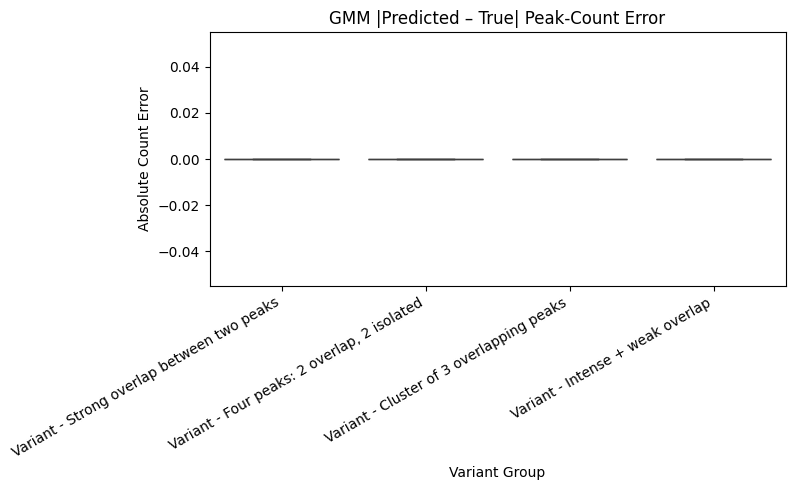

c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


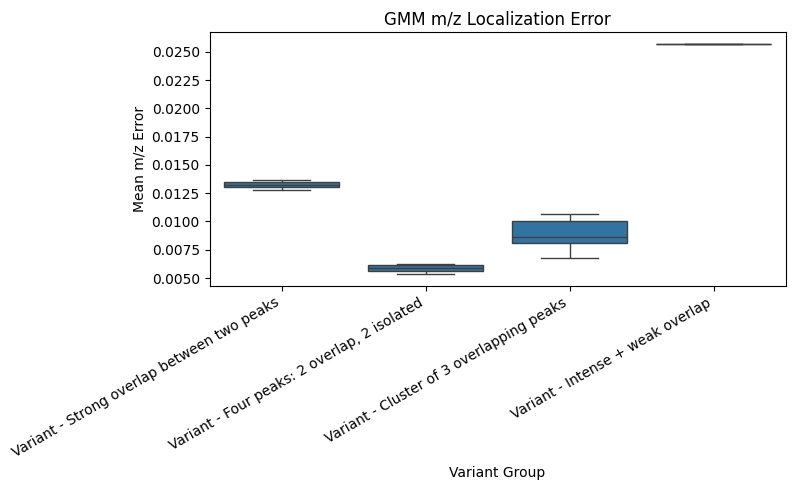

In [38]:
# %%
# 4.3.2.1 GMM‐Only Box‐Plots: Peak‐Count & Localization Errors

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load region‐level results and filter for GMM only
region = pd.read_csv("region_results.csv")
gmm = region[region["model"] == "GMM"]

# --- Absolute Peak‐Count Error ---
pc = gmm.dropna(subset=["count_error"])
plt.figure(figsize=(8,5))
sns.boxplot(
    data=pc,
    x="group",
    y="count_error",
    showfliers=False
)
plt.title("GMM |Predicted – True| Peak‐Count Error")
plt.xlabel("Variant Group")
plt.ylabel("Absolute Count Error")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# --- m/z Localization Error ---
le = gmm.dropna(subset=["mean_loc_error"])
plt.figure(figsize=(8,5))
sns.boxplot(
    data=le,
    x="group",
    y="mean_loc_error",
    showfliers=False
)
plt.title("GMM m/z Localization Error")
plt.xlabel("Variant Group")
plt.ylabel("Mean m/z Error")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [39]:
# %%
# 4.3.2.2 GMM‐Only Summary Statistics: Mean ± SD of Errors

# compute mean and std for count_error
stats_pc = (
    pc
    .groupby("group")["count_error"]
    .agg(mean_count_error="mean", std_count_error="std")
)

# compute mean and std for mean_loc_error
stats_le = (
    le
    .groupby("group")["mean_loc_error"]
    .agg(mean_loc_error="mean", std_loc_error="std")
)

# merge into a single summary table
stats_summary = stats_pc.join(stats_le)

# display table
print(stats_summary.round(3))


                                             mean_count_error  \
group                                                           
Variant - Cluster of 3 overlapping peaks                  0.0   
Variant - Four peaks: 2 overlap, 2 isolated               0.0   
Variant - Intense + weak overlap                          0.0   
Variant - Strong overlap between two peaks                0.0   

                                             std_count_error  mean_loc_error  \
group                                                                          
Variant - Cluster of 3 overlapping peaks                 0.0           0.009   
Variant - Four peaks: 2 overlap, 2 isolated              0.0           0.006   
Variant - Intense + weak overlap                         NaN           0.026   
Variant - Strong overlap between two peaks               0.0           0.013   

                                             std_loc_error  
group                                                       
Varian

C:\Users\victo\AppData\Local\Temp\ipykernel_2936\513435872.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


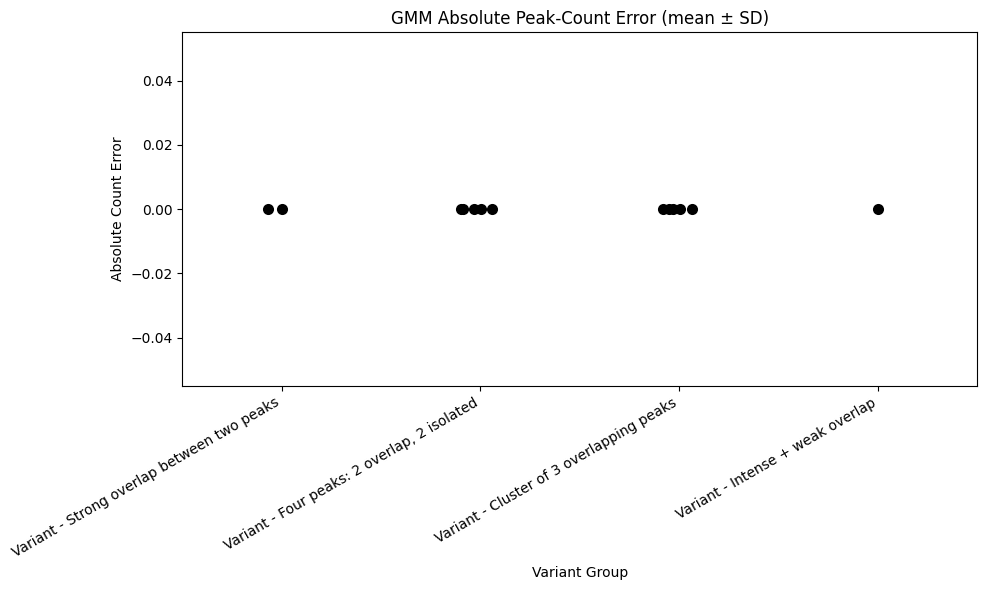

C:\Users\victo\AppData\Local\Temp\ipykernel_2936\513435872.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


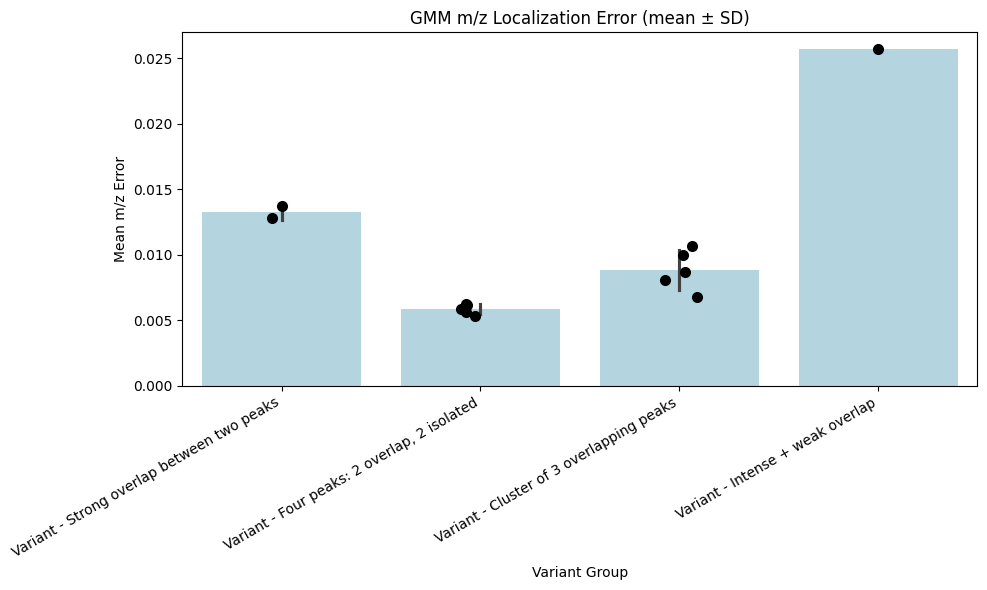

In [40]:
# Cell 1: Peak‑Count Error (GMM only) – barplot ± SD + raw points
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load per‑region metrics
region = pd.read_csv("region_results.csv")

# Filter to GMM and only those with a count_error
gmm_pc = region[(region["model"] == "GMM") & region["count_error"].notna()]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=gmm_pc,
    x="group",
    y="count_error",
    ci="sd",               # show ±1 SD error bars
    color="lightcoral"
)
# overlay raw points
sns.stripplot(
    data=gmm_pc,
    x="group",
    y="count_error",
    color="black",
    size=8,
    jitter=True
)
ax.set_title("GMM Absolute Peak‑Count Error (mean ± SD)")
ax.set_xlabel("Variant Group")
ax.set_ylabel("Absolute Count Error")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


# Cell 2: Localization Error (GMM only) – barplot ± SD + raw points
plt.figure(figsize=(10, 6))
# Filter to GMM and only those with a mean_loc_error
gmm_le = region[(region["model"] == "GMM") & region["mean_loc_error"].notna()]

ax = sns.barplot(
    data=gmm_le,
    x="group",
    y="mean_loc_error",
    ci="sd",               # show ±1 SD error bars
    color="lightblue"
)
# overlay raw points
sns.stripplot(
    data=gmm_le,
    x="group",
    y="mean_loc_error",
    color="black",
    size=8,
    jitter=True
)
ax.set_title("GMM m/z Localization Error (mean ± SD)")
ax.set_xlabel("Variant Group")
ax.set_ylabel("Mean m/z Error")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


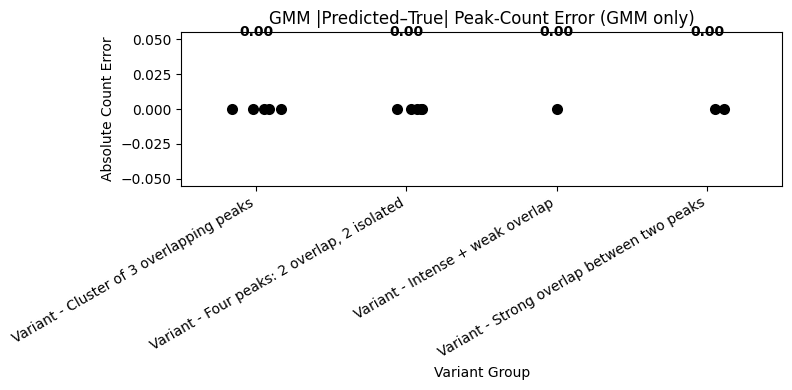

In [41]:
# %% 
# 4.3.2.1 GMM Absolute Peak‐Count Error: raw points + mean annotation only

import matplotlib.pyplot as plt
import seaborn as sns

# select only the GMM rows where we computed a count_error
pc = region[(region.model=="GMM") & region.count_error.notna()]

# compute summary for annotation
summary_pc = pc.groupby("group")["count_error"].agg(["mean"]).sort_values("mean")
order_pc   = summary_pc.index.tolist()

plt.figure(figsize=(8,4))
# stripplot for individual points + jitter
sns.stripplot(
    data=pc,
    x="group",
    y="count_error",
    order=order_pc,
    color="black",
    size=8,
    jitter=0.2
)
# annotate mean above each group
for i, grp in enumerate(order_pc):
    m = summary_pc.loc[grp,"mean"]
    plt.text(i, m + 0.05, f"{m:.2f}", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.title("GMM |Predicted–True| Peak-Count Error (GMM only)")
plt.xlabel("Variant Group")
plt.ylabel("Absolute Count Error")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


C:\Users\victo\AppData\Local\Temp\ipykernel_2936\1978631092.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python3

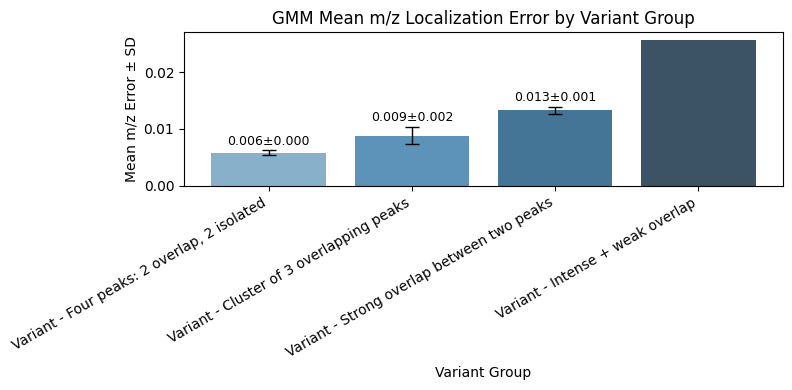

In [42]:
# %% 
# 4.3.2.2 GMM m/z Localization Error: ordered bars + mean±SD annotations

import matplotlib.pyplot as plt
import seaborn as sns

# select only the GMM rows where we computed a mean_loc_error
le = region[(region.model=="GMM") & region.mean_loc_error.notna()]

# compute summary for annotation and ordering
summary_le = le.groupby("group")["mean_loc_error"].agg(["mean","std"]).sort_values("mean")
order_le   = summary_le.index.tolist()

plt.figure(figsize=(8,4))
ax = sns.barplot(
    data=summary_le.reset_index(),
    x="group",
    y="mean",
    order=order_le,
    palette="Blues_d"
)
# add errorbars by hand
for i, (_, row) in enumerate(summary_le.iterrows()):
    ax.errorbar(
        i, row["mean"], 
        yerr=row["std"], 
        color="k", 
        capsize=5, 
        lw=1
    )
    # annotate mean±SD
    ax.text(
        i, row["mean"] + row["std"] + 0.0005, 
        f"{row['mean']:.3f}±{row['std']:.3f}", 
        ha="center", va="bottom", fontsize=9
    )

plt.title("GMM Mean m/z Localization Error by Variant Group")
plt.xlabel("Variant Group")
plt.ylabel("Mean m/z Error ± SD")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


C:\Users\victo\AppData\Local\Temp\ipykernel_2936\2563159756.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


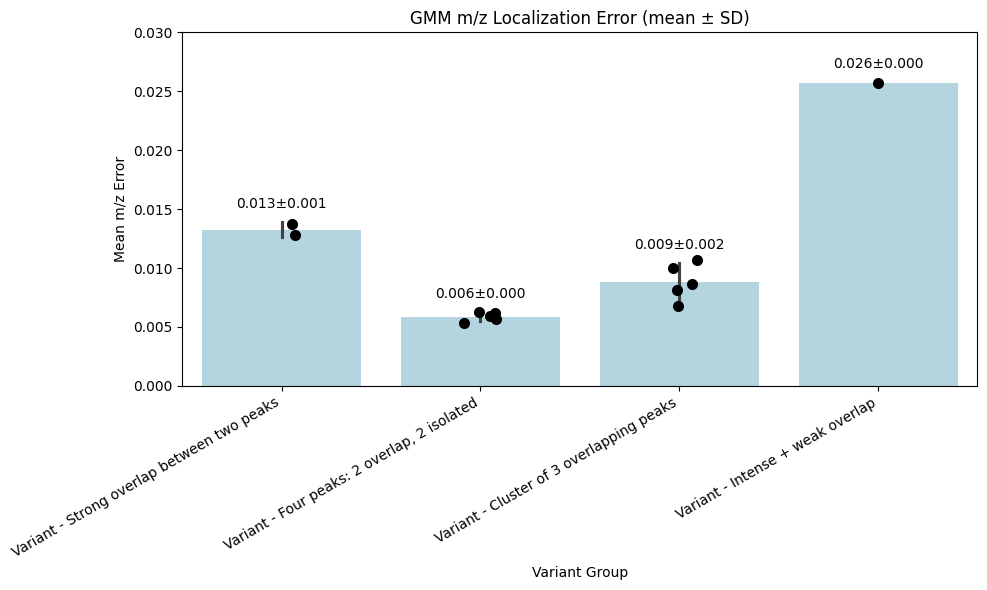

In [58]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=gmm_le,
    x="group",
    y="mean_loc_error",
    ci="sd",  # show ±1 SD error bars
    color="lightblue"
)
sns.stripplot(
    data=gmm_le,
    x="group",
    y="mean_loc_error",
    color="black",
    size=8,
    jitter=True
)

groups = [tick.get_text() for tick in ax.get_xticklabels()]
means = gmm_le.groupby("group")["mean_loc_error"].mean().reindex(groups)
stds  = gmm_le.groupby("group")["mean_loc_error"].std().reindex(groups)

# Set y-limit for annotation visibility
ax.set_ylim(0, 0.03)

for i, (group, m, s) in enumerate(zip(groups, means, stds)):
    if pd.isnull(s):  # If SD is NaN, set to 0 for annotation
        s = 0.0
    if pd.notnull(m):
        ax.text(
            i,
            m + s + 0.001,
            f"{m:.3f}±{s:.3f}",
            ha="center",
            va="bottom",
            fontsize=10
        )


ax.set_title("GMM m/z Localization Error (mean ± SD)")
ax.set_xlabel("Variant Group")
ax.set_ylabel("Mean m/z Error")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [56]:
groups = [tick.get_text() for tick in ax.get_xticklabels()]
means = gmm_le.groupby("group")["mean_loc_error"].mean().reindex(groups)
stds  = gmm_le.groupby("group")["mean_loc_error"].std().reindex(groups)

print("GROUP LABELS:", groups)
print("MEANS:", means.values)
print("STDS:", stds.values)

for i, (group, m, s) in enumerate(zip(groups, means, stds)):
    print(f"{group}: mean={m}, std={s}")
    if pd.notnull(m) and pd.notnull(s):
        ax.text(
            i,
            m + s + 0.001,
            f"{m:.3f}±{s:.3f}",
            ha="center",
            va="bottom",
            fontsize=10
        )


GROUP LABELS: ['Variant - Strong overlap between two peaks', 'Variant - Four peaks: 2 overlap, 2 isolated', 'Variant - Cluster of 3 overlapping peaks', 'Variant - Intense + weak overlap']
MEANS: [0.01325612 0.00585609 0.00883938 0.02569723]
STDS: [0.00062244 0.00037372 0.001553          nan]
Variant - Strong overlap between two peaks: mean=0.01325611659261475, std=0.0006224373733522933
Variant - Four peaks: 2 overlap, 2 isolated: mean=0.00585608582061066, std=0.00037372485913786304
Variant - Cluster of 3 overlapping peaks: mean=0.00883937525042022, std=0.0015529993995651858
Variant - Intense + weak overlap: mean=0.0256972251400355, std=nan


c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


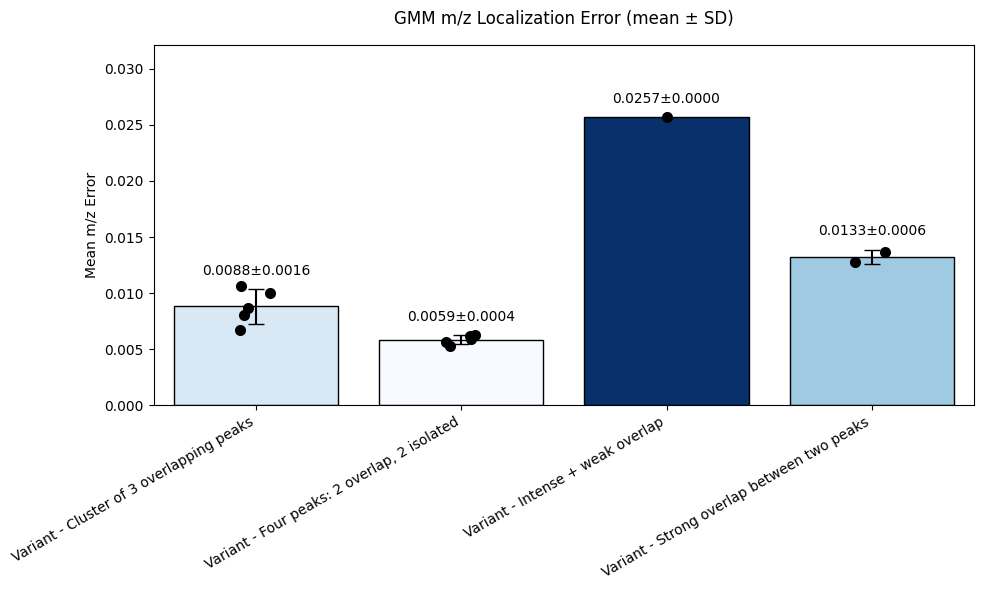

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
gmm_le = region[(region["model"] == "GMM") & region["mean_loc_error"].notna()]

# Compute means and stds per group
means = gmm_le.groupby("group")["mean_loc_error"].mean()
stds  = gmm_le.groupby("group")["mean_loc_error"].std()
groups = means.index.tolist()

# Normalize means for color mapping
norm = mpl.colors.Normalize(vmin=means.min(), vmax=means.max())
cmap = mpl.cm.Blues
colors = cmap(norm(means.values))

# Barplot: use colors per bar
bars = plt.bar(
    groups,
    means,
    yerr=stds,
    capsize=6,
    color=colors,
    edgecolor="black"
)

# Overlay raw points (stripplot)
sns.stripplot(
    data=gmm_le,
    x="group",
    y="mean_loc_error",
    color="black",
    size=8,
    jitter=True
)

# Annotate mean±SD (handle NaN SDs)
for i, (m, s) in enumerate(zip(means, stds)):
    s_show = 0 if np.isnan(s) else s
    plt.text(
        i,
        m + s_show + 0.001,
        f"{m:.4f}±{s_show:.4f}",
        ha="center", va="bottom", fontsize=10
    )

plt.title("GMM m/z Localization Error (mean ± SD)", pad=15)
plt.xlabel("")
plt.ylabel("Mean m/z Error")
plt.xticks(rotation=30, ha="right")
y_max = (means + stds.replace(np.nan, 0)).max()
plt.ylim(0, y_max * 1.25)
plt.tight_layout()
plt.show()

c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


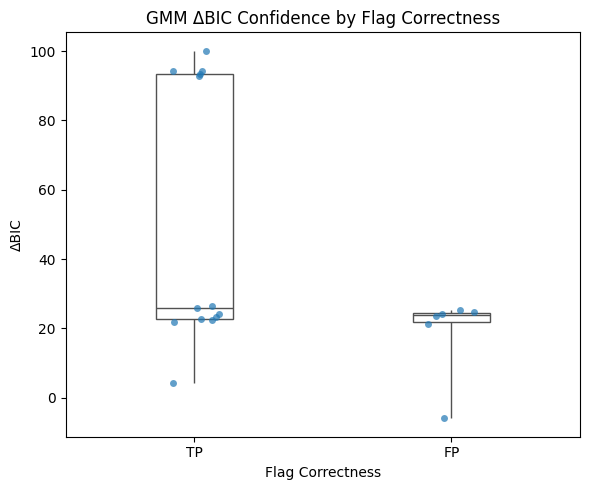

In [104]:
import pandas as pd

df = pd.read_csv("region_results.csv")
# Filter to only GMM and predicted positive (called overlap)
df_gmm = df[(df["model"] == "GMM") & (df["overlap_pred"] == True)].copy()

def flag_correctness(row):
    if row["overlap_true"]:
        return "TP"
    else:
        return "FP"

df_gmm["correctness"] = df_gmm.apply(flag_correctness, axis=1)
df_gmm = df_gmm[df_gmm["confidence"].notna()]  # drop NA

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.stripplot(data=df_gmm, x="correctness", y="confidence", jitter=True, alpha=0.7)
sns.boxplot(data=df_gmm, x="correctness", y="confidence", whis=[0, 100], width=0.3, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False)
plt.title("GMM ΔBIC Confidence by Flag Correctness")
plt.xlabel("Flag Correctness")
plt.ylabel("ΔBIC")
plt.tight_layout()
plt.show()


c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


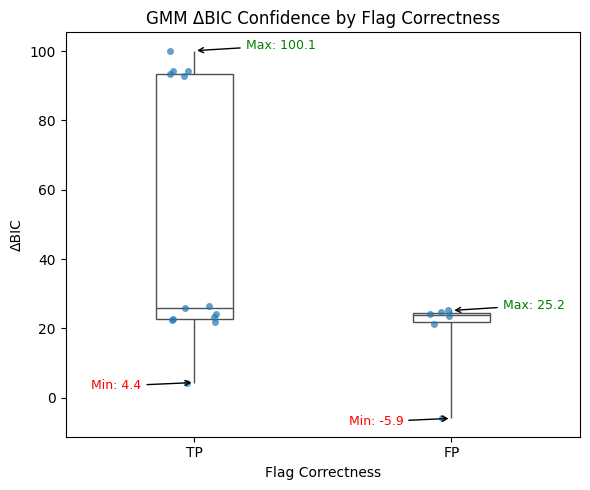

In [119]:
# ... your previous code ...

plt.figure(figsize=(6, 5))
sns.stripplot(data=df_gmm, x="correctness", y="confidence", jitter=True, alpha=0.7)
sns.boxplot(data=df_gmm, x="correctness", y="confidence", whis=[0, 100], width=0.3, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False)
plt.title("GMM ΔBIC Confidence by Flag Correctness")
plt.xlabel("Flag Correctness")
plt.ylabel("ΔBIC")

# Annotate min and max for each group
for group in df_gmm["correctness"].unique():
    subset = df_gmm[df_gmm["correctness"] == group]
    if subset.empty:
        continue
    x = list(df_gmm["correctness"].unique()).index(group)
    min_idx = subset["confidence"].idxmin()
    max_idx = subset["confidence"].idxmax()
    # Annotate max
    plt.annotate(
        f"Max: {subset.loc[max_idx, 'confidence']:.1f}",
        xy=(x, subset.loc[max_idx, "confidence"]),
        xytext=(x+0.2, subset.loc[max_idx, "confidence"]+0.5),
        arrowprops=dict(arrowstyle="->", lw=1),
        fontsize=9, color='green'
    )
    # Annotate min
    plt.annotate(
        f"Min: {subset.loc[min_idx, 'confidence']:.1f}",
        xy=(x, subset.loc[min_idx, "confidence"]),
        xytext=(x-0.4, subset.loc[min_idx, "confidence"]-2),
        arrowprops=dict(arrowstyle="->", lw=1),
        fontsize=9, color='red'
    )

plt.tight_layout()
plt.show()


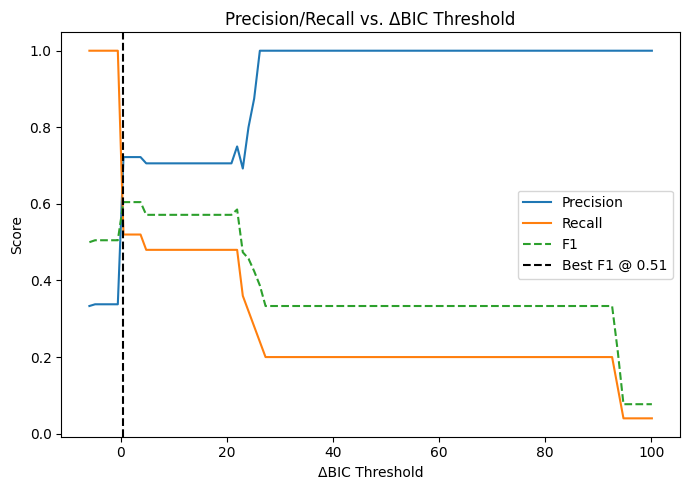

Best F1 = 0.60 at ΔBIC threshold 0.51


In [66]:
import numpy as np
import matplotlib.pyplot as plt

df_gmm = df[df["model"] == "GMM"].copy()
df_gmm = df_gmm[df_gmm["confidence"].notna()]

# Only consider regions that are "overlap_true" or "overlap_pred" (optional, or just keep all)
thresholds = np.linspace(df_gmm['confidence'].min(), df_gmm['confidence'].max(), 100)
precision, recall, f1 = [], [], []

for t in thresholds:
    pred = (df_gmm['confidence'] >= t)
    tp = ((pred) & (df_gmm['overlap_true'])).sum()
    fp = ((pred) & (~df_gmm['overlap_true'])).sum()
    fn = ((~pred) & (df_gmm['overlap_true'])).sum()
    prec = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    rec = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    precision.append(prec)
    recall.append(rec)
    f1.append(2*prec*rec/(prec+rec) if prec+rec>0 else np.nan)

# Find optimal threshold (max F1)
f1 = np.array(f1)
best_idx = np.nanargmax(f1)
best_t = thresholds[best_idx]

plt.figure(figsize=(7, 5))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.plot(thresholds, f1, '--', label="F1")
plt.axvline(best_t, color="k", ls="--", label=f"Best F1 @ {best_t:.2f}")
plt.xlabel("ΔBIC Threshold")
plt.ylabel("Score")
plt.title("Precision/Recall vs. ΔBIC Threshold")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Best F1 = {f1[best_idx]:.2f} at ΔBIC threshold {best_t:.2f}")


Index(['group', 'label', 'model', 'region_idx', 'overlap_true', 'overlap_pred',
       'count_error', 'mean_loc_error', 'confidence', 'correctness'],
      dtype='object')


<Axes: xlabel='correctness', ylabel='confidence'>

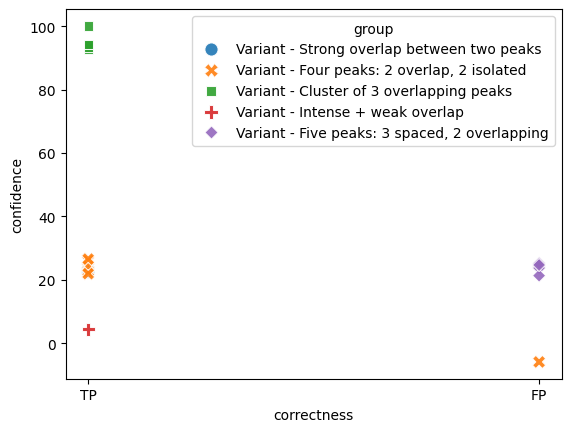

In [75]:
df = df.copy()  # To avoid modifying original data if needed
# Only keep regions where model == "GMM" and overlap_pred is True
df_gmm = df[(df['model'] == 'GMM') & (df['overlap_pred']) & (~df['confidence'].isna())].copy()

df_gmm['correctness'] = np.where(
    (df_gmm['overlap_true']) & (df_gmm['overlap_pred']), "TP",
    np.where((~df_gmm['overlap_true']) & (df_gmm['overlap_pred']), "FP", "Other")
)

# Optional: Filter out 'Other' if you only want TP and FP
df_gmm = df_gmm[df_gmm['correctness'].isin(["TP", "FP"])]
print(df_gmm.columns)

sns.scatterplot(
    data=df_gmm,
    x="correctness",
    y="confidence",
    hue="group",        # Change to your actual column name!
    style="group",      # Likewise, or remove if not needed
    s=90,
    alpha=0.9
)

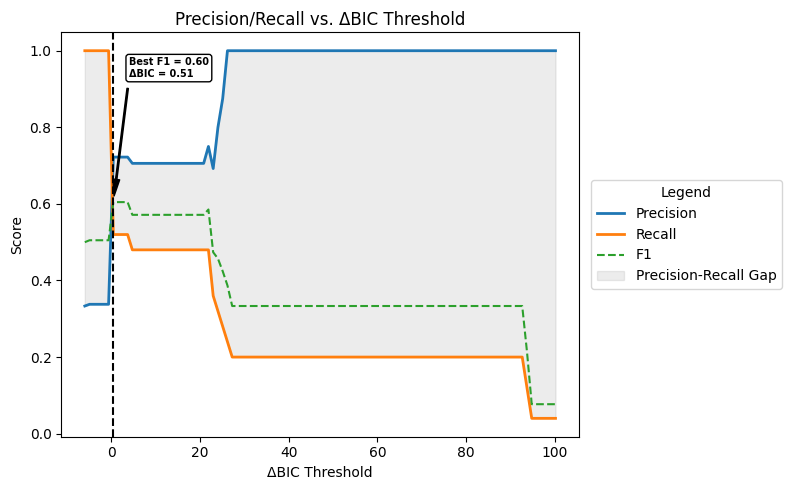

In [99]:
# Find best F1 and corresponding threshold
f1 = 2 * np.array(precision) * np.array(recall) / (np.array(precision) + np.array(recall) + 1e-10)
best_idx = np.argmax(f1)
best_f1 = f1[best_idx]
best_threshold = thresholds[best_idx]
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision, label='Precision', lw=2)
plt.plot(thresholds, recall, label='Recall', lw=2)
plt.plot(thresholds, f1, label='F1', linestyle="--", lw=1.5)
plt.fill_between(thresholds, precision, recall, color='gray', alpha=0.15, label='Precision-Recall Gap')

plt.axvline(x=best_threshold, color='k', linestyle='dashed')
plt.annotate(
    f"Best F1 = {best_f1:.2f}\nΔBIC = {best_threshold:.2f}",
    xy=(best_threshold, best_f1),                # arrow points to this
    xytext=(best_threshold + 3.5, best_f1 + 0.35), # this is the new text position (tweak as needed)
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
    fontsize=7,
    ha='left', va='center', weight='bold', color='black',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1,)
)

plt.xlabel("ΔBIC Threshold")
plt.ylabel("Score")
plt.title("Precision/Recall vs. ΔBIC Threshold")
plt.legend(
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),
    frameon=True,
    title='Legend'
)
plt.tight_layout(rect=[0,0,0.75,1])  # Make room on the right

plt.tight_layout()
plt.show()



In [ ]:
from src.deconvolution.visualization import plot_horizontal_gmm, plot_residual_heatmap
from test_pipeline_final import load_grid

# Suppose you have selected an example:
success_row = df_gmm.query('correctness == "TP" & confidence > 20').iloc[0]
fail_row = df_gmm.query('correctness == "FP" | confidence < 5').iloc[0]

# Load region data
grid, mz_axis, rt_axis = load_grid(success_row['label'])

# Re-fit GMM for this region
from src.deconvolution.peak_deconvolver import PeakDeconvolver

# Initialize model (adjust parameters if needed)
gmm_model = PeakDeconvolver(method="gmm").model
result = gmm_model.fit(grid, mz_axis, rt_axis, region_index=int(success_row['region_idx']))

# Unpack outputs
gmm = result['gmm']
scaler = result['scaler']
mz_shrink = result['mz_shrink']

# Now plot
plot_horizontal_gmm(grid, mz_axis, rt_axis, gmm, scaler, int(success_row['region_idx']), mz_shrink)
plot_residual_heatmap(grid, mz_axis, rt_axis, gmm, scaler, int(success_row['region_idx']))



[GMM] Single-component model selected (ΔBIC=nan)
[GMM] Exception during fit: 'NoneType' object has no attribute 'means_'


KeyError: 'gmm'